# **Classify gestures by reading muscle activity.**
## A recording of human hand muscle activity producing four different hand gestures

In [1]:
from google.colab import files, auth, drive
import numpy as np

# Mount to Google drive
drive.mount('/content/gdrive', force_remount=True)
data_dir_drive ='/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
# Unzip dataset to /content
import time

start = time.time()

!unzip -u '/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/emg-4.zip' -d '/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/'

print('Took', (time.time() - start), ' secundes to unzip')

Archive:  /content/gdrive/My Drive/Colab Notebooks/PML/Proj1/emg-4.zip
Took 4.912923336029053  secundes to unzip


In [3]:
! ls '/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/'

0.csv  1.csv  2.csv  3.csv  emg-4.zip  Project1PML.ipynb


# **Utils**
Some utility function to visualize the dataset and the model's predictions

In [0]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [0]:
classes = {0: 'rock', 1: 'scissors', 2: 'paper', 3: 'ok'}

In [7]:
import pandas as pd 
import glob

pd.set_option("display.precision", 2)

# read data (4 csv file and put them in one list with 4 file streams)
data = []
for i in range(len(glob.glob(data_dir_drive + '*.csv'))):
    data.append(pd.read_csv(data_dir_drive + str(i) + '.csv')) 

# Preview the first 5 lines of the loaded data for each table
for i in range(len(glob.glob(data_dir_drive + '*.csv'))):
    print(data_dir_drive + str(i) + '.csv')
    print(data[i].head())

/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/0.csv
   26.0  4.0  5.0   8.0  -1.0  -13.0  ...  5.0.1  4.0.4  -7.0.1  -59.0  16.0  0
0 -47.0 -6.0 -5.0  -7.0  13.0   -1.0  ...    5.0   13.0    21.0  111.0  15.0  0
1 -19.0 -8.0 -8.0  -8.0 -21.0   -6.0  ...   -8.0    7.0    21.0  114.0  48.0  0
2   2.0  3.0  0.0   2.0   0.0   22.0  ...   11.0   33.0    39.0  119.0  43.0  0
3   6.0  0.0  0.0  -2.0 -14.0   10.0  ...    6.0  -13.0   -24.0 -112.0 -69.0  0
4  15.0 -5.0 -5.0 -15.0  12.0  -22.0  ...   11.0    5.0    30.0  -48.0  25.0  0

[5 rows x 65 columns]
/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/1.csv
   -7.0  -1.0  -1.0.1  0.0  -10.0  ...  15.0.1  11.0  -4.0.7  -5.0.6  1
0  -6.0  -2.0    -5.0 -2.0   27.0  ...    15.0  12.0     0.0    -7.0  1
1   5.0   0.0    -1.0 -2.0    2.0  ...   -23.0 -25.0     2.0    -1.0  1
2  31.0   4.0     2.0 -2.0   38.0  ...    -7.0   0.0    -3.0    -2.0  1
3  -4.0  -4.0     3.0  3.0  -25.0  ...     7.0  26.0     3.0    -7.0  1
4  -8.0  -3.0    -1.0  

In [8]:
data[0].head()

26.0  4.0  5.0   8.0  -1.0  -13.0  ...  5.0.1  4.0.4  -7.0.1  -59.0  16.0  0
0 -47.0 -6.0 -5.0  -7.0  13.0   -1.0  ...    5.0   13.0    21.0  111.0  15.0  0
1 -19.0 -8.0 -8.0  -8.0 -21.0   -6.0  ...   -8.0    7.0    21.0  114.0  48.0  0
2   2.0  3.0  0.0   2.0   0.0   22.0  ...   11.0   33.0    39.0  119.0  43.0  0
3   6.0  0.0  0.0  -2.0 -14.0   10.0  ...    6.0  -13.0   -24.0 -112.0 -69.0  0
4  15.0 -5.0 -5.0 -15.0  12.0  -22.0  ...   11.0    5.0    30.0  -48.0  25.0  0

[5 rows x 65 columns]

In [9]:
# print the shape of tables
for i in range(len(glob.glob(data_dir_drive + '*.csv'))):
    print(data_dir_drive + str(i) + '.csv')
    print(data[i].shape)

/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/0.csv
(2909, 65)
/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/1.csv
(2902, 65)
/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/2.csv
(2942, 65)
/content/gdrive/My Drive/Colab Notebooks/PML/Proj1/3.csv
(2921, 65)


In [10]:
# print column name for table 1 (rock dataset)
print(data[0].columns)

Index(['26.0', '4.0', '5.0', '8.0', '-1.0', '-13.0', '-109.0', '-66.0', '-9.0',
       '2.0', '4.0.1', '13.0', '-18.0', '-30.0', '-119.0', '-45.0', '17.0',
       '6.0', '-1.0.1', '-9.0.1', '27.0', '20.0', '91.0', '71.0', '-26.0',
       '-1.0.2', '0.0', '1.0', '13.0.1', '20.0.1', '-62.0', '-19.0', '29.0',
       '2.0.1', '2.0.2', '0.0.1', '-23.0', '-1.0.3', '-80.0', '4.0.2', '-7.0',
       '-6.0', '-12.0', '-27.0', '-11.0', '-16.0', '-67.0', '-8.0', '-27.0.1',
       '1.0.1', '1.0.2', '13.0.2', '-8.0.1', '-11.0.1', '21.0', '-28.0',
       '61.0', '4.0.3', '8.0.1', '5.0.1', '4.0.4', '-7.0.1', '-59.0', '16.0',
       '0'],
      dtype='object')


In [11]:
# print same iformations about each column for table 1
print(data[0].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909 entries, 0 to 2908
Data columns (total 65 columns):
26.0       2909 non-null float64
4.0        2909 non-null float64
5.0        2909 non-null float64
8.0        2909 non-null float64
-1.0       2909 non-null float64
-13.0      2909 non-null float64
-109.0     2909 non-null float64
-66.0      2909 non-null float64
-9.0       2909 non-null float64
2.0        2909 non-null float64
4.0.1      2909 non-null float64
13.0       2909 non-null float64
-18.0      2909 non-null float64
-30.0      2909 non-null float64
-119.0     2909 non-null float64
-45.0      2909 non-null float64
17.0       2909 non-null float64
6.0        2909 non-null float64
-1.0.1     2909 non-null float64
-9.0.1     2909 non-null float64
27.0       2909 non-null float64
20.0       2909 non-null float64
91.0       2909 non-null float64
71.0       2909 non-null float64
-26.0      2909 non-null float64
-1.0.2     2909 non-null float64
0.0        2909 non-null float64
1.

# **Data Analysis**

In [12]:
# The describe method shows basic statistical characteristics of each 
# numerical feature (int64 and float64 types): number of non-missing values, 
# mean, standard deviation, range, median, 0.25 and 0.75 quartiles.
data[0].describe()

26.0     4.0      5.0      8.0  ...   -7.0.1    -59.0     16.0       0
count  2909.00  2909.0  2909.00  2909.00  ...  2909.00  2909.00  2909.00  2909.0
mean     -0.63    -0.7    -0.73    -0.72  ...    -0.69    -3.67    -1.07     0.0
std      25.58    11.9     6.21    10.84  ...    18.53    48.96    24.05     0.0
min    -116.00   -99.0   -27.00   -73.00  ...  -115.00  -128.00  -124.00     0.0
25%     -14.00    -4.0    -4.00    -6.00  ...   -10.00   -31.00   -13.00     0.0
50%      -2.00    -1.0    -1.00     0.00  ...    -1.00    -5.00    -1.00     0.0
75%      10.00     3.0     2.00     5.00  ...     7.00    24.00    10.00     0.0
max     111.00    90.0    34.00    55.00  ...   102.00   127.00   127.00     0.0

[8 rows x 65 columns]

In [0]:
import matplotlib.pyplot as plt

Data distribution for ***rock*** gesture, of the same muscle in all 8 consecutive readings

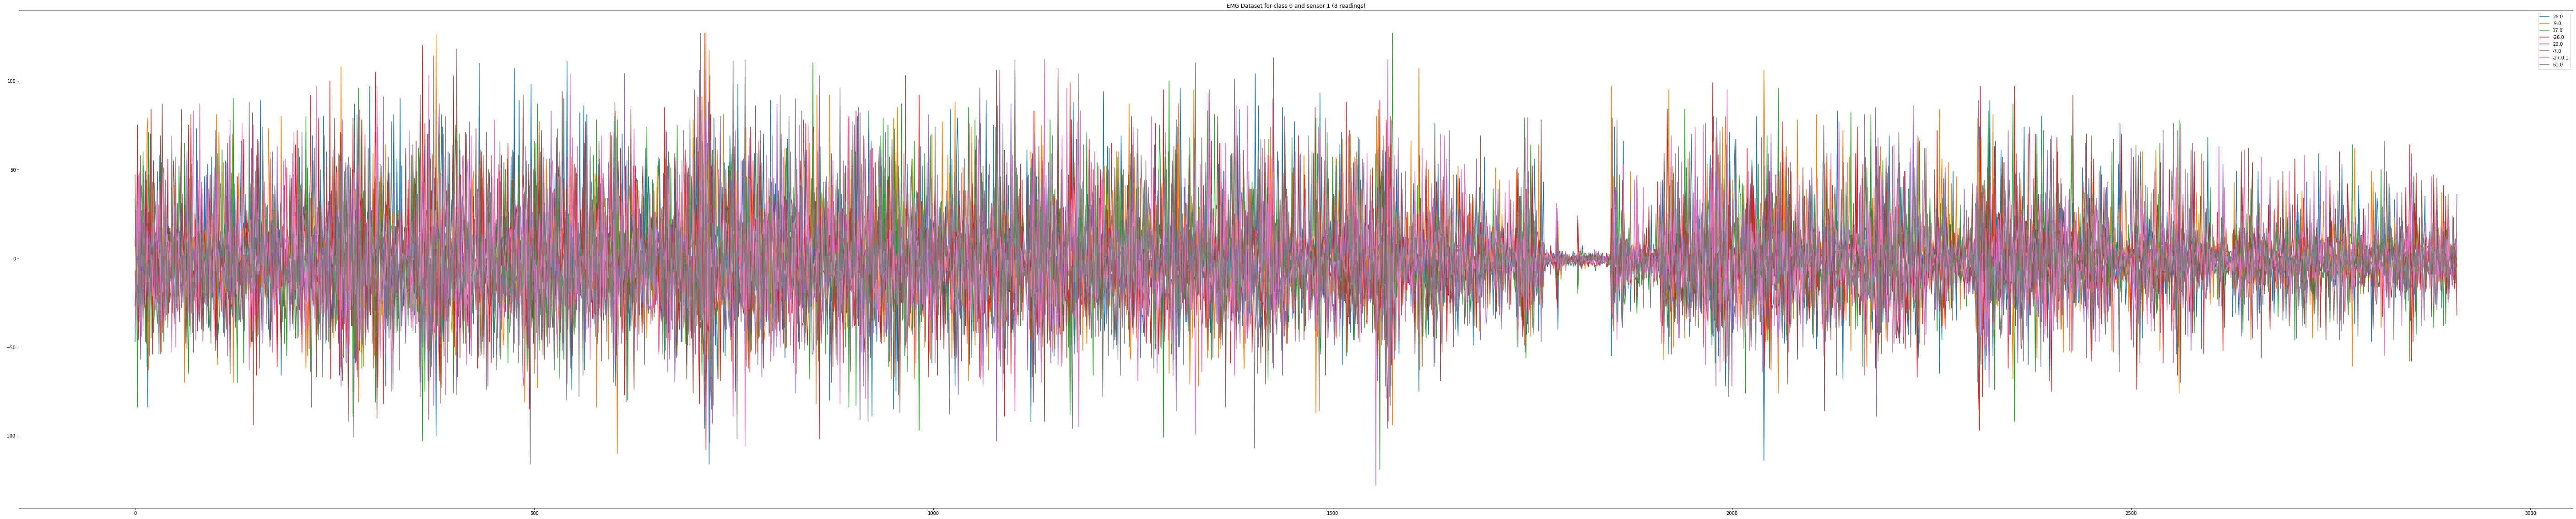

In [14]:
# get columns to plot
columns = []
for c in range(0, 64, 8):
    columns.append(data[0].columns[c])
# create x data
x_data = range(0, data[0].shape[0])
# create figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(100, 20, forward=True)
# plot each column
for column in columns:
    ax.plot(x_data, data[0][column], label=column)
# set title and legend
ax.set_title('EMG Dataset for class 0 and sensor 1 (8 readings)')
ax.legend()

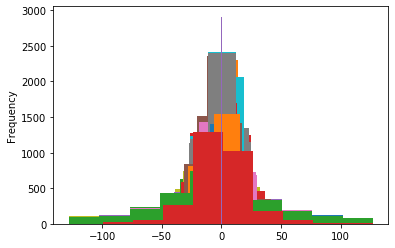

In [15]:
for column in data[0].columns:
    data[0][column].plot.hist()

***rock*** gesture data distribution for all 8 muscles and 8 reads

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d6b2c2eb8>,
      dtype=object)

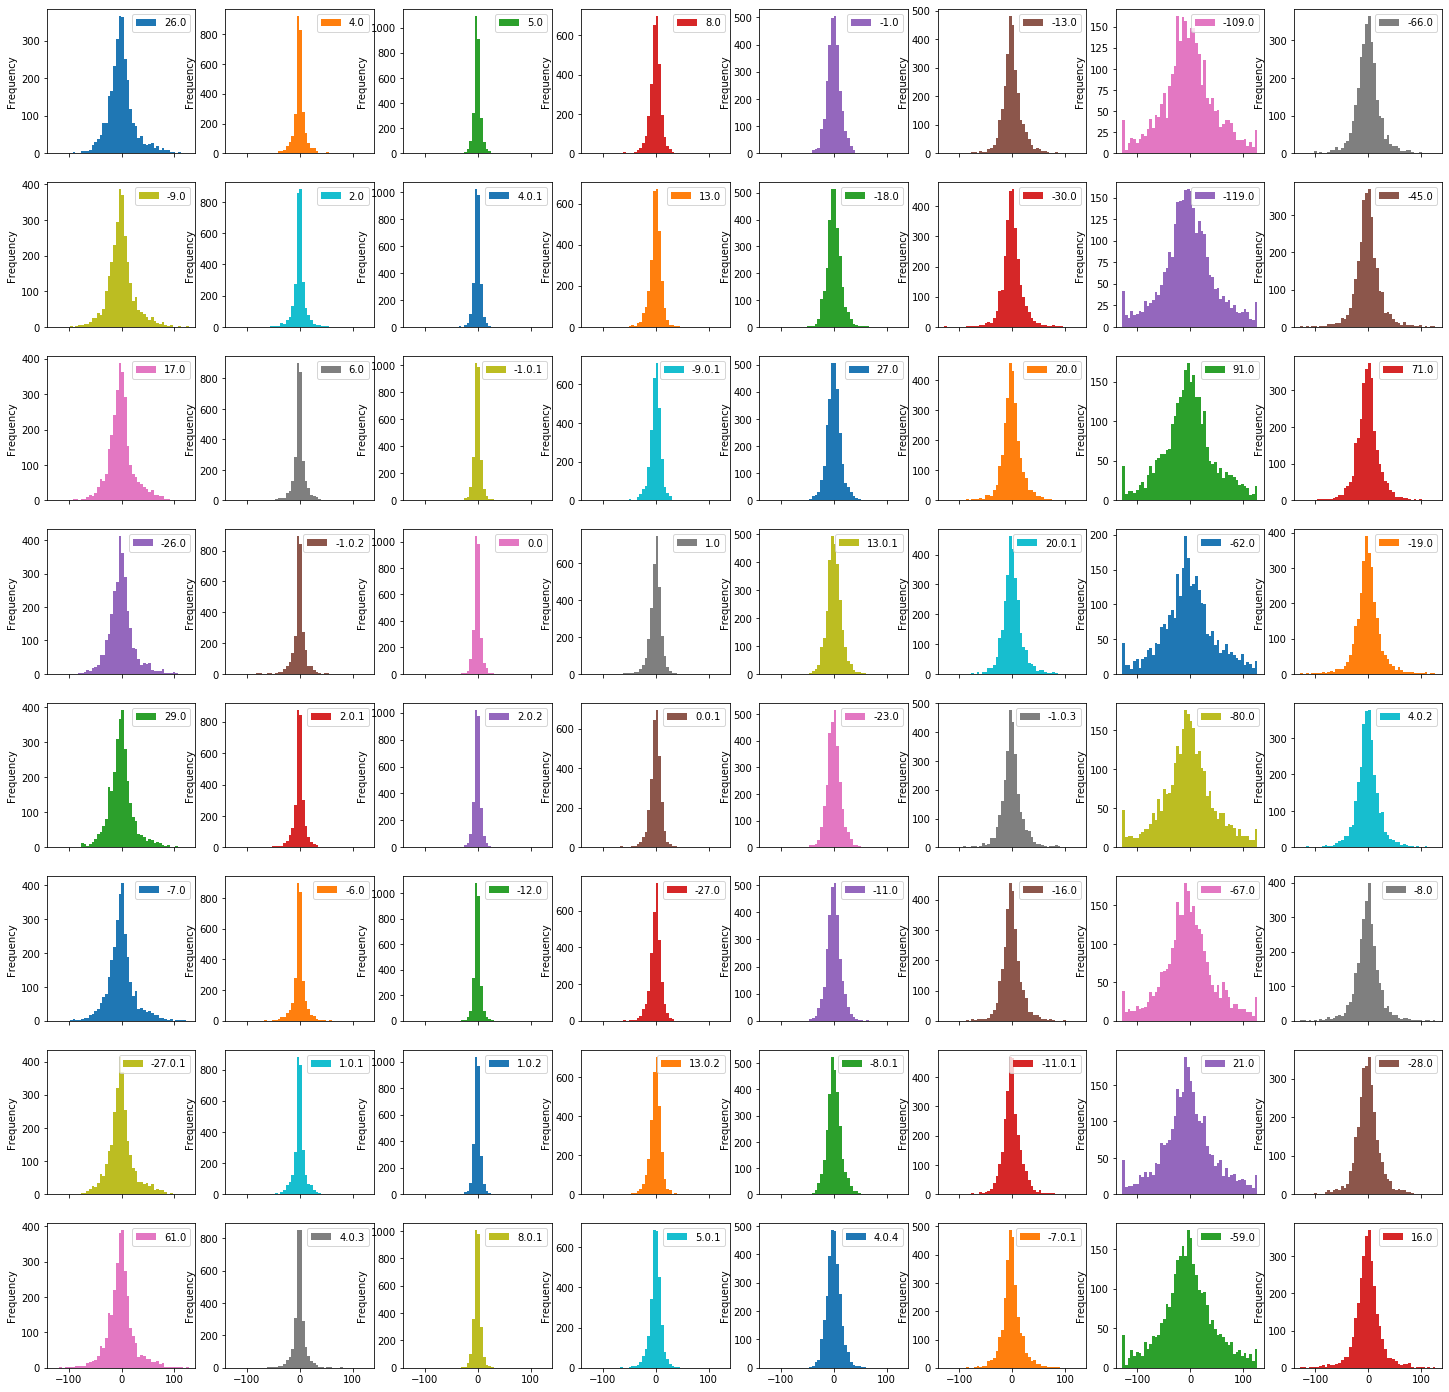

In [16]:
data[0][data[0].columns[:64]].plot.hist(subplots=True, layout=(8,8), figsize=(25, 25), bins=50)

## Label distribution
*It can easily see that the classes are balanced* 

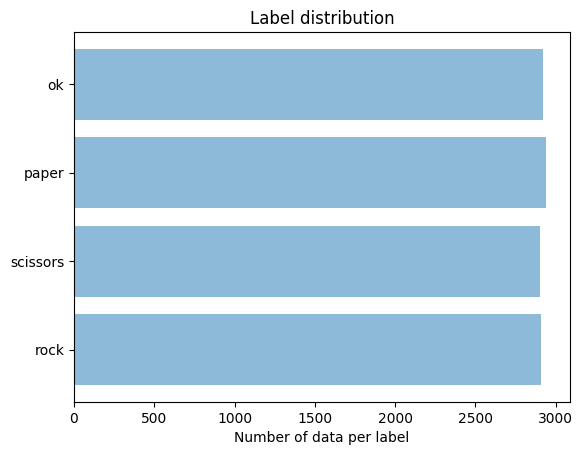

rock: 2909
scissors: 2902
paper: 2942
ok: 2921


In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = classes.values()
y_pos = np.arange(len(objects))
nr = [len(data[i]) for i in range(4)]

plt.barh(y_pos, nr, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of data per label')
plt.title('Label distribution')

plt.show()

for idx, clas in classes.items():
    print(clas + ': ' + str(len(data[idx])))

# **Split data in train, validation and test**
First of all the label of a gesture is extracted from all the information.

The dataset is divided in three categories: training, validation and test.

The first one will be, obviously, used for trainig; the validation set will be used to measure the model performance during training and the test set will be used to evaluate our model performance once the training has finished.

Note: These three sets should all contain different datas.

In [18]:
npData = np.concatenate((data[0].to_numpy(), data[1].to_numpy(), data[2].to_numpy(), data[3].to_numpy()))
print(npData.shape)

Tdata = np.transpose(npData)
Labels = np.transpose(Tdata[-1])
pureData = np.transpose(Tdata[:-1])

(11674, 65)


In [0]:
# shuffle data
randPerm = np.random.permutation((npData.shape)[0])
pureDataRand = pureData[randPerm][:]
LabelsRand = Labels[randPerm][:]

In [20]:
import math

train_size = math.floor(0.8 * (pureDataRand.shape)[0])
val_size = math.floor(0.1 * (pureDataRand.shape)[0])
test_size = (pureDataRand.shape)[0] - train_size - val_size
train_data = pureDataRand[0:train_size][:]
train_labels = LabelsRand[0:train_size][:]
val_data = pureDataRand[train_size:train_size + val_size][:]
val_labels = LabelsRand[train_size:train_size + val_size][:]
test_data = pureDataRand[train_size + val_size :][:]
test_labels = LabelsRand[train_size + val_size :][:]
print(train_size)
print(val_size)
print(test_size)
print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)
print(test_data.shape)
print(test_labels.shape)

9339
1167
1168
(9339, 64)
(9339,)
(1167, 64)
(1167,)
(1168, 64)
(1168,)


# **Normalize data**

![scaling.png](https://avinton.com/wp-content/uploads/2017/11/centering-standadization.png)

In [21]:
from sklearn import preprocessing # import the preprocessing library
 
# define the normalizer
scaler = preprocessing.StandardScaler()
# compute the mean and the std on the training set
scaler.fit(train_data)

# print the mean
print('mean =', scaler.mean_.shape)  
# print the standard deviation
print('std =', scaler.scale_.shape) 

# scaling the training data
train_data_scaled = scaler.transform(train_data)
print(train_data_scaled.shape)  

# scaling the val data
val_data_scaled = scaler.transform(val_data)
print(val_data_scaled.shape)    

# scaling the test data
test_data_scaled = scaler.transform(test_data)
print(test_data_scaled.shape) 

mean = (64,)
std = (64,)
(9339, 64)
(1167, 64)
(1168, 64)


# **Training - SVM**

![svm.png](https://miro.medium.com/max/1200/1*06GSco3ItM3gwW2scY6Tmg.png)
In the left side, we have some possible decision functions that correctly classify (separate) the two classes (blue circles and red squares). In the right side, we have the decision function of an SVM that chooses the maximal margin between the two classes. 

![tehn.png](https://i.stack.imgur.com/zKpJy.jpg)
 
The first technique is __OneVsAll__:
    - using this approach K (number of classes) classifiers are trained, one classifier for each class in order to separate that class from the rest. The final label is given by the classifier with the maximum score.
    
The second technique is __OneVsOne__:
    - using this approch K * (K - 1) / 2 classifiers are trained, one classifier for each pair of two classes. The final label is given by the majority label.

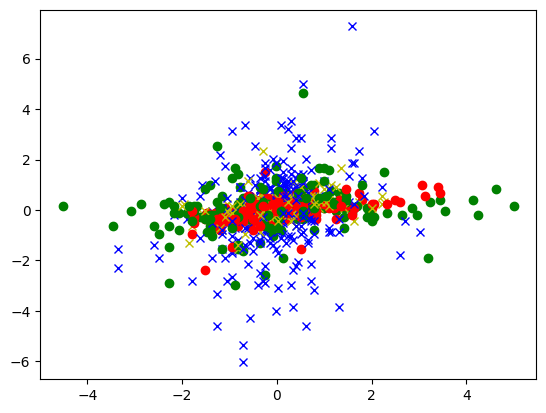

In [22]:
from sklearn import svm # import the library

# plot the data
# here for all first 1000 data from train see data in 2D by feature 0 and 1
for i in range(1000):
    if train_labels[i] == 0:
        plt.plot(train_data_scaled[i, 0], train_data_scaled[i, 1], 'og')
    elif train_labels[i] == 1:
        plt.plot(train_data_scaled[i, 0], train_data_scaled[i, 1], 'or')
    elif train_labels[i] == 2:
        plt.plot(train_data_scaled[i, 0], train_data_scaled[i, 1], 'xb')
    else:
        plt.plot(train_data_scaled[i, 0], train_data_scaled[i, 1], 'xy')
plt.show()

In [23]:
# train a SVM model
C_param = 1
# or decision_function_shape='ovr'
svm_model = svm.SVC(C_param, decision_function_shape='ovo', class_weight='balanced') # define the model
print(svm_model)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


### The regularization parameter and **grid search for C param**

C is the regularization parameter and controls the error of the classifier on the training set.
    - if C is big, a hyperplane with a small separation margin will be chosen, if this has better performance on the training set. (it can overfit).
    - if C is small, a hyperplane with a bigger separation margin will be chosen, even if this hyperplane does not separate the training set perfectly. (it can underfit). 
![C_param.png](https://qph.fs.quoracdn.net/main-qimg-c49906cb927e21fce85624c589762b5d)

In the left it is used a bigger C, in the right it's used a smaller C and the hyperplane does not separate perfectly the training set.

In [24]:
from sklearn.metrics import accuracy_score

svm_model.fit(train_data_scaled, train_labels) # train

predicted_labels_test = svm_model.predict(test_data_scaled) # predit
print(accuracy_score(test_labels, predicted_labels_test))

val_acc = accuracy_score(val_labels, svm_model.predict(val_data_scaled))

0.913527397260274


In [25]:
C_param_list = np.logspace(0, 3, 25, endpoint=True, base = 10) - 0.99
print(C_param_list)

[1.00000000e-02 3.43521432e-01 7.88279410e-01 1.38137371e+00
 2.17227766e+00 3.22696503e+00 4.63341325e+00 6.50894209e+00
 9.01000000e+00 1.23452143e+01 1.67927941e+01 2.27237371e+01
 3.06327766e+01 4.11796503e+01 5.52441325e+01 7.39994209e+01
 9.90100000e+01 1.32362143e+02 1.76837941e+02 2.36147371e+02
 3.15237766e+02 4.20706503e+02 5.61351325e+02 7.48904209e+02
 9.99010000e+02]


In [26]:
svm_best = svm_model
acc_best = val_acc
C_opt = C_param

C_params = []
accs_val = []
accs_train = []

for C_param in C_param_list:
    # train a SVM model
    svm_model = svm.SVC(C_param, decision_function_shape='ovo', class_weight='balanced') # define the model
    svm_model.fit(train_data_scaled, train_labels) # train

    predicted_labels_val = svm_model.predict(val_data_scaled) # predit
    acc = accuracy_score(val_labels, predicted_labels_val)
    print('C_param = ' + str(C_param) + '  accuracy = ' + str(acc))

    if acc > acc_best:
        acc_best = acc
        svm_best = svm_model
        C_opt = C_param

    accs_val.append(acc)
    accs_train.append(accuracy_score(train_labels, svm_model.predict(train_data_scaled)))

C_param = 0.010000000000000009  accuracy = 0.41730934018851756
C_param = 0.343521432163324  accuracy = 0.8517566409597258
C_param = 0.7882794100389228  accuracy = 0.8834618680377035
C_param = 1.381373705661655  accuracy = 0.8980291345329906
C_param = 2.1722776601683798  accuracy = 0.9091688089117395
C_param = 3.226965034285822  accuracy = 0.910025706940874
C_param = 4.633413251903491  accuracy = 0.9134532990574121
C_param = 6.508942093324558  accuracy = 0.9091688089117395
C_param = 9.01  accuracy = 0.9125964010282777
C_param = 12.34521432163324  accuracy = 0.9108826049700086
C_param = 16.79279410038923  accuracy = 0.9125964010282777
C_param = 22.723737056616553  accuracy = 0.9091688089117395
C_param = 30.632776601683794  accuracy = 0.9057412167952014
C_param = 41.179650342858224  accuracy = 0.9031705227077977
C_param = 55.244132519034906  accuracy = 0.9014567266495287
C_param = 73.99942093324559  accuracy = 0.9023136246786633
C_param = 99.01  accuracy = 0.9023136246786633
C_param = 132

In [27]:
print('acc_best on val = ' + str(acc_best))
print('C_opt = ' + str(C_opt))

predicted_labels_test = svm_best.predict(test_data_scaled) # predit
print('test acc = ' + str(accuracy_score(test_labels, predicted_labels_test)))

acc_best on val = 0.9134532990574121
C_opt = 4.633413251903491
test acc = 0.9315068493150684


Plot the best C param

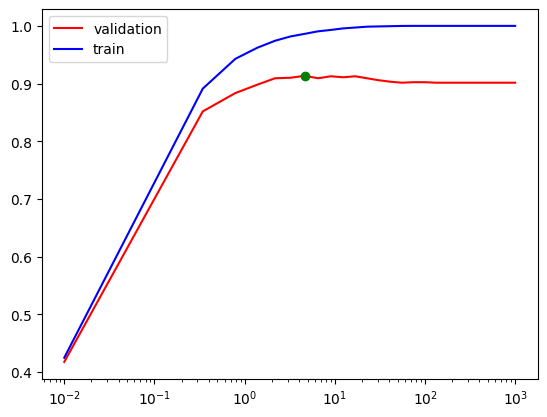

In [28]:
import matplotlib.pyplot as plt

plt.plot(C_param_list, accs_val, label='validation', color='red', scalex='log')
plt.plot(C_param_list, accs_train, label='train', color='blue', scalex='log')
plt.plot(C_opt, acc_best, 'go')
plt.xscale('log')
plt.legend()
plt.show()

In [29]:
C = np.zeros([4, 4])

for idx, item in enumerate(test_data_scaled):
    label = svm_best.predict([item]) # predit
    C[int(test_labels[idx])][int(label[0])] += 1

print(C)

[[283.   3.   7.   4.]
 [  1. 296.   1.   5.]
 [  3.   9. 269.  19.]
 [  6.  19.   3. 240.]]


Confusion matrix, without normalization
[[283.   3.   7.   4.]
 [  1. 296.   1.   5.]
 [  3.   9. 269.  19.]
 [  6.  19.   3. 240.]]
Normalized confusion matrix
[[0.95286195 0.01010101 0.02356902 0.01346801]
 [0.00330033 0.97689769 0.00330033 0.01650165]
 [0.01       0.03       0.89666667 0.06333333]
 [0.02238806 0.07089552 0.01119403 0.89552239]]


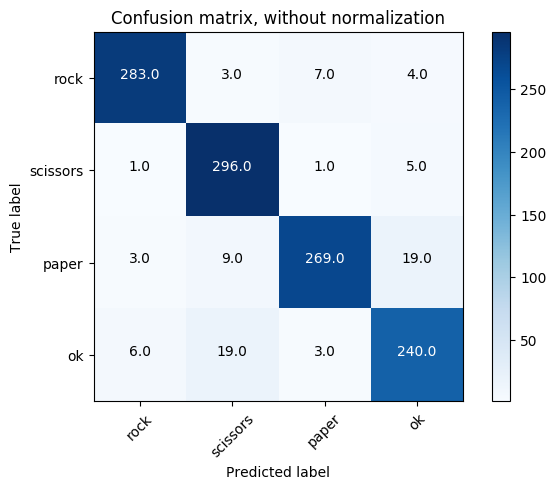

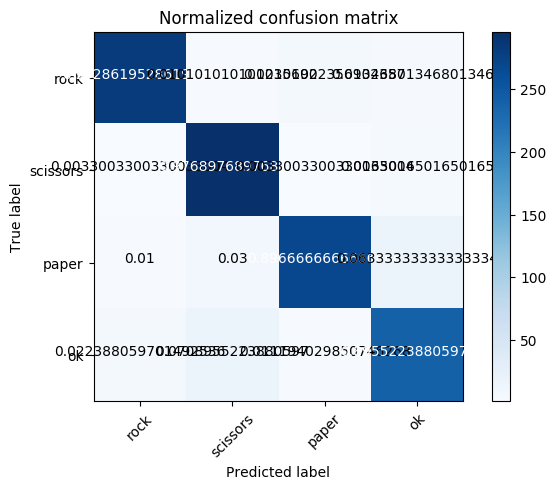

In [30]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

### The regularization parameter and **random search for C param**


In [31]:
# train a SVM model
C_param = 1
# or decision_function_shape='ovr'
svm_model = svm.SVC(C_param, decision_function_shape='ovo', class_weight='balanced') # define the model
print(svm_model)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [32]:
from sklearn.metrics import accuracy_score

svm_model.fit(train_data_scaled, train_labels) # train

predicted_labels_test = svm_model.predict(test_data_scaled) # predit
print(accuracy_score(test_labels, predicted_labels_test))

val_acc = accuracy_score(val_labels, svm_model.predict(val_data_scaled))

0.913527397260274


In [33]:
C_param_list = np.logspace(0, 3, 10000, endpoint=True, base = 10) - 0.99
a = np.arange(10000)
np.random.shuffle(a)
C_param_list = C_param_list[a[:25]]
C_param_list = np.sort(C_param_list)
print(C_param_list)

[4.48188400e-01 1.49393092e+00 1.63326330e+00 2.06807790e+00
 2.14292209e+00 3.30302360e+00 3.58473600e+00 3.97328915e+00
 4.03539400e+00 7.98212446e+00 1.11441232e+01 1.18247687e+01
 1.42091108e+01 2.25137475e+01 4.16446769e+01 6.43052348e+01
 9.15643083e+01 9.69587955e+01 1.06980057e+02 1.13273044e+02
 1.54291283e+02 1.81410533e+02 2.46546567e+02 4.28905933e+02
 4.85494163e+02]


In [34]:
svm_best = svm_model
acc_best = val_acc
C_opt = C_param

C_params = []
accs_val = []
accs_train = []

for C_param in C_param_list:
    # train a SVM model
    svm_model = svm.SVC(C_param, decision_function_shape='ovo', class_weight='balanced') # define the model
    svm_model.fit(train_data_scaled, train_labels) # train

    predicted_labels_val = svm_model.predict(val_data_scaled) # predit
    acc = accuracy_score(val_labels, predicted_labels_val)
    print('C_param = ' + str(C_param) + '  accuracy = ' + str(acc))

    if acc > acc_best:
        acc_best = acc
        svm_best = svm_model
        C_opt = C_param

    accs_val.append(acc)
    accs_train.append(accuracy_score(train_labels, svm_model.predict(train_data_scaled)))

C_param = 0.4481884001221652  accuracy = 0.8654670094258783
C_param = 1.4939309219294297  accuracy = 0.9014567266495287
C_param = 1.6332633046276024  accuracy = 0.9040274207369323
C_param = 2.068077904431334  accuracy = 0.9057412167952014
C_param = 2.142922090339665  accuracy = 0.9074550128534704
C_param = 3.303023603939045  accuracy = 0.9108826049700086
C_param = 3.584735998438596  accuracy = 0.9125964010282777
C_param = 3.9732891501042005  accuracy = 0.9134532990574121
C_param = 4.035394001268604  accuracy = 0.9134532990574121
C_param = 7.9821244622026555  accuracy = 0.9117395029991431
C_param = 11.14412322060191  accuracy = 0.9108826049700086
C_param = 11.824768678715706  accuracy = 0.9108826049700086
C_param = 14.209110829529338  accuracy = 0.9108826049700086
C_param = 22.513747546094354  accuracy = 0.9091688089117395
C_param = 41.64467691927037  accuracy = 0.9031705227077977
C_param = 64.30523483323299  accuracy = 0.9023136246786633
C_param = 91.56430833834607  accuracy = 0.903170

In [35]:
print('acc_best on val = ' + str(acc_best))
print('C_opt = ' + str(C_opt))

predicted_labels_test = svm_best.predict(test_data_scaled) # predit
print('test acc = ' + str(accuracy_score(test_labels, predicted_labels_test)))

acc_best on val = 0.9134532990574121
C_opt = 3.9732891501042005
test acc = 0.9340753424657534


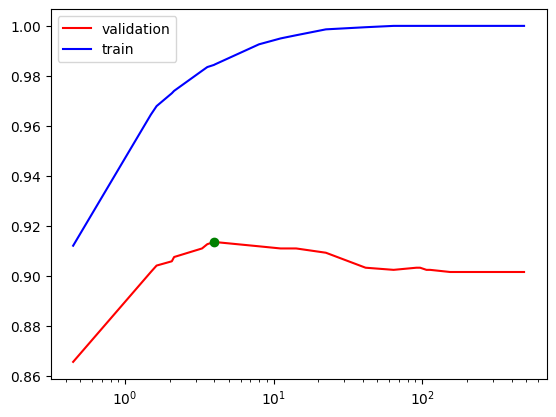

In [36]:
import matplotlib.pyplot as plt

plt.plot(C_param_list, accs_val, label='validation', color='red', scalex='log')
plt.plot(C_param_list, accs_train, label='train', color='blue', scalex='log')
plt.plot(C_opt, acc_best, 'go')
plt.xscale('log')
plt.legend()
plt.show()

In [37]:
C = np.zeros([4, 4])

for idx, item in enumerate(test_data_scaled):
    label = svm_best.predict([item]) # predit
    C[int(test_labels[idx])][int(label[0])] += 1

print(C)

[[284.   3.   7.   3.]
 [  0. 297.   1.   5.]
 [  3.   8. 268.  21.]
 [  5.  19.   2. 242.]]


Confusion matrix, without normalization
[[284.   3.   7.   3.]
 [  0. 297.   1.   5.]
 [  3.   8. 268.  21.]
 [  5.  19.   2. 242.]]
Normalized confusion matrix
[[0.95622896 0.01010101 0.02356902 0.01010101]
 [0.         0.98019802 0.00330033 0.01650165]
 [0.01       0.02666667 0.89333333 0.07      ]
 [0.01865672 0.07089552 0.00746269 0.90298507]]


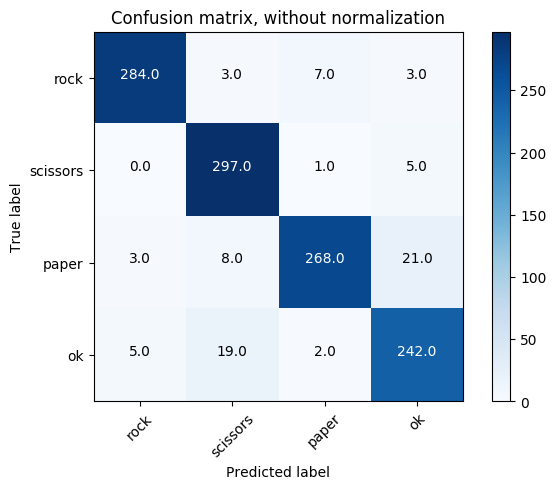

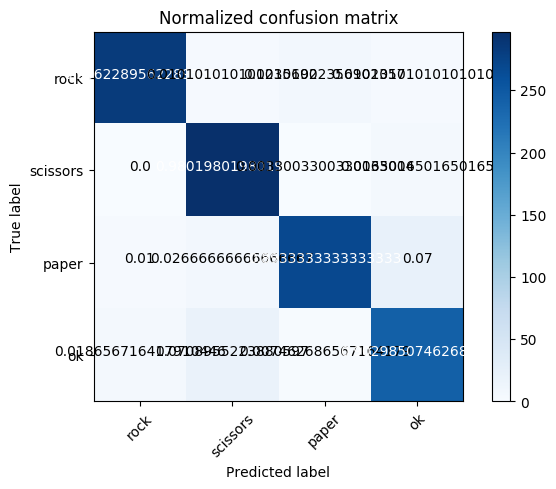

In [38]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **Training k-NN**

![knn.jpeg](https://i2.wp.com/blog.kaggle.com/wp-content/uploads/2015/04/04_1nn_map.png)

An example of the difference between Nearest Neighbor and a 5-Nearest Neighbor classifier, using 2-dimensional points and 3 classes (red, blue, green). The colored regions show the decision boundaries induced by the classifier with an L2 distance. The white regions show points that are ambiguously classified (i.e. class votes are tied for at least two classes). Notice that in the case of a NN classifier, outlier datapoints (e.g. green point in the middle of a cloud of blue points) create small islands of likely incorrect predictions, while the 5-NN classifier smooths over these irregularities, likely leading to better generalization on the test data (not shown). Also note that the gray regions in the 5-NN image are caused by ties in the votes among the nearest neighbors (e.g. 2 neighbors are red, next two neighbors are blue, last neighbor is green).

## **Grid search**

In [39]:
from sklearn.neighbors import KNeighborsClassifier

K_param = 3
neigh = KNeighborsClassifier(n_neighbors=K_param, weights='uniform')  # define the model
neigh.fit(train_data_scaled, train_labels) #train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
predicted_labels_test = neigh.predict(test_data_scaled) # predit
print(accuracy_score(test_labels, predicted_labels_test))

val_acc = accuracy_score(val_labels, neigh.predict(val_data_scaled))

0.6763698630136986


In [41]:
knn_best = neigh
acc_best = val_acc
K_opt = K_param

K_params = []
accs_val = []
accs_train = []

for K_param in range(1, 25):
    # train a Knn model
    neigh = KNeighborsClassifier(n_neighbors=K_param, weights='uniform')  # define the model
    neigh.fit(train_data_scaled, train_labels) #train

    predicted_labels_val = neigh.predict(val_data_scaled) # predit
    acc = accuracy_score(val_labels, predicted_labels_val)
    print('K_param = ' + str(K_param) + '  accuracy = ' + str(acc))

    if acc > acc_best:
        acc_best = acc
        knn_best = neigh
        K_opt = K_param

    accs_val.append(acc)
    accs_train.append(accuracy_score(train_labels, neigh.predict(train_data_scaled)))

K_param = 1  accuracy = 0.6409597257926307
K_param = 2  accuracy = 0.6503856041131105
K_param = 3  accuracy = 0.6546700942587832
K_param = 4  accuracy = 0.6580976863753213
K_param = 5  accuracy = 0.6589545844044559
K_param = 6  accuracy = 0.6529562982005142
K_param = 7  accuracy = 0.6572407883461868
K_param = 8  accuracy = 0.6512425021422451
K_param = 9  accuracy = 0.6426735218508998
K_param = 10  accuracy = 0.6443873179091688
K_param = 11  accuracy = 0.6383890317052271
K_param = 12  accuracy = 0.6435304198800342
K_param = 13  accuracy = 0.6306769494430163
K_param = 14  accuracy = 0.6341045415595544
K_param = 15  accuracy = 0.6298200514138818
K_param = 16  accuracy = 0.6178234790059983
K_param = 17  accuracy = 0.6178234790059983
K_param = 18  accuracy = 0.6118251928020566
K_param = 19  accuracy = 0.6066838046272494
K_param = 20  accuracy = 0.6066838046272494
K_param = 21  accuracy = 0.6075407026563839
K_param = 22  accuracy = 0.6041131105398457
K_param = 23  accuracy = 0.59982862039417

In [42]:
print('acc_best on val = ' + str(acc_best))
print('K_opt = ' + str(K_opt))

predicted_labels_test = knn_best.predict(test_data_scaled) # predit
print('test acc = ' + str(accuracy_score(test_labels, predicted_labels_test)))

acc_best on val = 0.6589545844044559
K_opt = 5
test acc = 0.6789383561643836


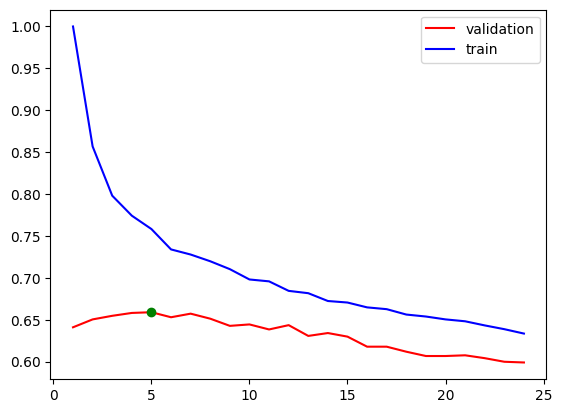

In [43]:
import matplotlib.pyplot as plt

plt.plot(range(1, 25), accs_val, label='validation', color='red')
plt.plot(range(1, 25), accs_train, label='train', color='blue')
plt.plot(K_opt, acc_best, 'go')
plt.legend()
plt.show()

In [44]:
C = np.zeros([4, 4])

for idx, item in enumerate(test_data_scaled):
    label = knn_best.predict([item]) # predit
    C[int(test_labels[idx])][int(label[0])] += 1

print(C)

[[204.  43.  24.  26.]
 [  0. 282.   1.  20.]
 [  2. 102.  94. 102.]
 [  6.  46.   3. 213.]]


Confusion matrix, without normalization
[[204.  43.  24.  26.]
 [  0. 282.   1.  20.]
 [  2. 102.  94. 102.]
 [  6.  46.   3. 213.]]
Normalized confusion matrix
[[0.68686869 0.14478114 0.08080808 0.08754209]
 [0.         0.93069307 0.00330033 0.0660066 ]
 [0.00666667 0.34       0.31333333 0.34      ]
 [0.02238806 0.17164179 0.01119403 0.79477612]]


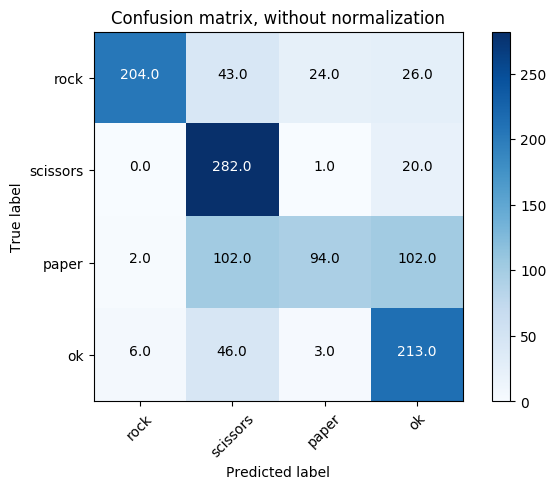

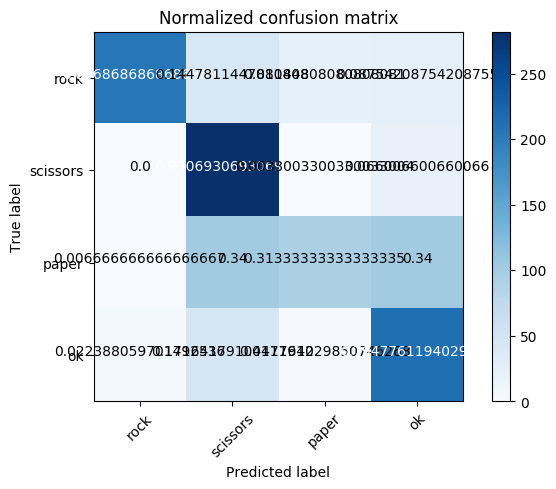

In [45]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **Training NN**

In [48]:
import torch

# using CUDA (GPU) if is possible
CUDA_LAUNCH_BLOCKING=1

plt.ion()  

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using CUDA")
else:
    device = torch.device('cpu')
    print("Using CPU")

Using CUDA


In [0]:
# transform all fata to tensors and move to GPU
train_data_scaled_tensor = torch.Tensor(train_data_scaled).to(device)
train_labels_tensor = torch.Tensor(train_labels).to(device)
val_data_scaled_tensor = torch.Tensor(val_data_scaled).to(device)
val_labels_tensor = torch.Tensor(val_labels).to(device)
test_data_scaled_tensor = torch.Tensor(test_data_scaled).to(device)
test_labels_tensor = torch.Tensor(test_labels).to(device)

In [0]:
import matplotlib.pyplot as plt

# plot loss function
def plot_loss(loss, label, color='blue'):
    plt.plot(loss, label=label, color=color)
    plt.legend()

# **Training**
What follows is pretty standard pytorch code for training.

For every epoch we iterate over all the training set, compute the loss , and adjust the network weights with loss.backward() and optimizer.step(). Then we evaluate the performance over the validaton set. At the end of every epoch we print the network progress (loss and accuracy). The accuracy will tell us how many predictions were correct.

As we said before, transfer learning can work on smaller dataset too, so for every epoch we only iterate over half the trainig dataset (worth noting that it won't exactly be half of it over the entire training, as the data is shuffled, but it will almost certainly be a subset)

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    # nn.Module - base class for all models
    # easy acces to .parameters() and .zero_grad()
    # define .forward() instead of __call__()
    
    def __init__(self, in_size, h_size1, h_size2, out_size, p = 0.05):
        super().__init__()
        self._layer1 = nn.Linear(in_size,h_size1).to(device)
        self._layer2 = nn.Linear(h_size1,h_size2).to(device)
        self._layer3 = nn.Linear(h_size2,out_size).to(device)
        self._dropout1 = nn.Dropout(p=p)
        self._dropout2 = nn.Dropout(p=p)
        
    def forward(self, x):
        x = self._dropout1(F.relu(self._layer1(x)).to(device))
        x = self._dropout2(F.relu(self._layer2(x)).to(device))
        x = self._layer3(x).to(device)
        x = F.softmax(x).to(device)
        return x.to(device)
        
    def train(self, train_data, train_labels, 
              epochs=400, lr=0.01, verbose=100, l2_weight=0,
              val_data=None, val_labels=None, plot_val = True):
        #use optimizers to take care of the update step
        optimizer1 = torch.optim.SGD(self.parameters(), lr=lr,
                               weight_decay = l2_weight)
        optimizer2 = torch.optim.Adagrad(self.parameters(), lr=lr,
                               weight_decay = l2_weight)
        optimizer3 = torch.optim.RMSprop(self.parameters(), lr=lr,
                               weight_decay = l2_weight)
        optimizer4 = torch.optim.Adam(self.parameters(), lr=lr,
                               weight_decay = l2_weight)
        
        criterion = nn.CrossEntropyLoss();
        
        train_loss = []
        val_loss = []
        for e in range(epochs):
            optimizer1.zero_grad()   # zero the gradient buffers
            input = train_data
            output = self(train_data)
            loss = criterion(output, train_labels)
            loss.backward()
            optimizer1.step()    # Does the update
            
            train_loss.append(loss.cpu().detach().numpy())
            if verbose!=0 and e%verbose==0:
                print("Loss - train :")
                print(loss)
            if val_data is not None:
                output = self(val_data)
                loss = criterion(output, val_labels)
                if verbose!=0 and e%verbose==0:
                    print("Loss - validation :")
                    print(loss)
                val_loss.append(loss.cpu().detach().numpy())

        if(plot_val):    
            plot_loss(train_loss, 'train-loss')
            if len(val_loss)>0:
                plot_loss(val_loss, 'val-loss', color='red')

    def accuracy(self, data, true_labers):
        num_ok = 0
        for idx, test in enumerate(data):
            output = net(test.type(torch.float))
            target = true_labers[idx]
            if output.max(0)[1] == target:
                num_ok += 1
        return num_ok / len(data)
        

In [122]:
#define net
net = Net(64, 512, 128, 4)
net.to(device)
print(net)

Net(
  (_layer1): Linear(in_features=64, out_features=512, bias=True)
  (_layer2): Linear(in_features=512, out_features=128, bias=True)
  (_layer3): Linear(in_features=128, out_features=4, bias=True)
  (_dropout1): Dropout(p=0.05, inplace=False)
  (_dropout2): Dropout(p=0.05, inplace=False)
)


In [123]:
#train from 2 examples from train set
input = train_data_scaled_tensor[0:2][:]
print(input.shape)
output = net(input.type(torch.float))
print(output.shape)
target = train_labels_tensor[0:2][:]
print(target.shape)

criterion = nn.CrossEntropyLoss()

loss = criterion(output, target.type(torch.long))
print(loss)

torch.Size([2, 64])
torch.Size([2, 4])
torch.Size([2])
tensor(1.3957, device='cuda:0', grad_fn=<NllLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Loss - train :
tensor(1.3831, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3816, device='cuda:0', grad_fn=<NllLossBackward>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Loss - train :
tensor(1.3525, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3466, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.3242, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3199, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.2820, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.2786, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.2285, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.2252, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.1693, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.1681, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.1072, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.1130, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.0497, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - v

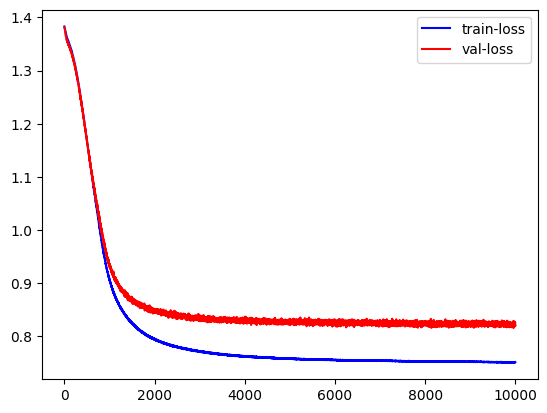

In [124]:
#train from all examples from train set
net.train((train_data_scaled_tensor).type(torch.float), (train_labels_tensor).type(torch.long), 
        epochs=10000,lr=0.1,verbose=100,
        val_data = (val_data_scaled_tensor).type(torch.float), 
        val_labels=(val_labels_tensor).type(torch.long)) 

In [125]:
# evaluate one example from test set
input = test_data_scaled_tensor[0][:]
print(input)
output = net(input.type(torch.float))
print(output)
print(output.max(0)[1])
target = test_labels_tensor[0]
print(target)

tensor([-0.8296,  1.0806,  0.7567,  1.2977,  0.0692, -0.0161,  4.8730,  3.8914,
         1.5627, -0.2852, -1.4622, -0.5690, -1.1152,  0.8519,  1.7673, -0.9189,
        -0.0115, -0.5421, -0.4502, -0.9913,  2.0689,  0.7503, -2.3714,  0.9738,
         0.2010, -0.2728, -0.2611,  1.3288, -0.9836, -0.9772, -0.2321,  0.4400,
        -0.5197,  0.3168, -0.0402,  0.9125,  0.2732, -0.2201,  0.2285, -0.1409,
         0.2714,  0.1606, -0.0354, -0.7219,  0.0055, -0.2497, -3.8380, -3.2260,
         0.8086,  1.8281,  1.1783, -0.8518, -0.4981,  0.0139,  3.0718, -0.6620,
        -2.6009, -0.7801, -0.0460, -0.4540, -0.3299,  1.7683,  1.5746,  0.6850],
       device='cuda:0')
tensor([1.0000e+00, 8.3505e-35, 6.5184e-22, 8.4093e-18], device='cuda:0',
       grad_fn=<SoftmaxBackward>)
tensor(0, device='cuda:0')
tensor(0., device='cuda:0')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [126]:
# evaluate net from all examples from test set
num_ok = 0
C = np.zeros([4, 4])

for idx, test in enumerate(test_data_scaled_tensor):
    output = net(test.type(torch.float))
    target = test_labels_tensor[idx]
    C[int(test_labels_tensor[idx])][int(output.max(0)[1])] += 1
    if output.max(0)[1] == target:
        num_ok += 1

print('acc = ' + str(num_ok / len(test_data_scaled_tensor)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


acc = 0.9434931506849316


In [127]:
print(C)

[[285.   0.  10.   2.]
 [  0. 292.   2.   9.]
 [  4.   2. 277.  17.]
 [  3.   9.   8. 248.]]


Confusion matrix, without normalization
[[285.   0.  10.   2.]
 [  0. 292.   2.   9.]
 [  4.   2. 277.  17.]
 [  3.   9.   8. 248.]]
Normalized confusion matrix
[[0.95959596 0.         0.03367003 0.00673401]
 [0.         0.96369637 0.00660066 0.02970297]
 [0.01333333 0.00666667 0.92333333 0.05666667]
 [0.01119403 0.03358209 0.02985075 0.92537313]]


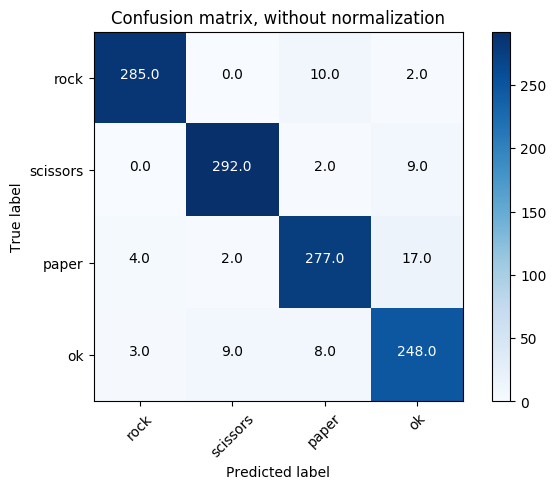

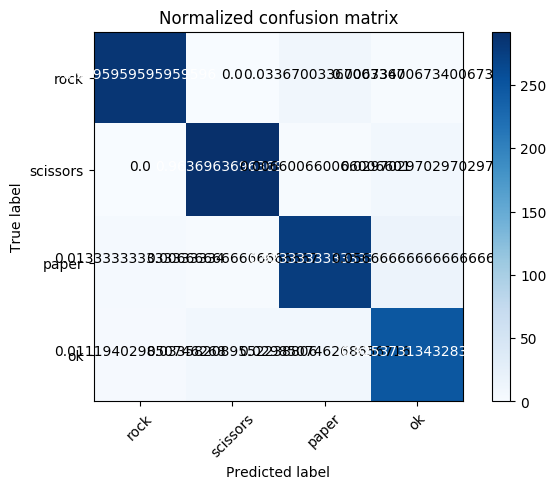

In [128]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## **Random search for learning rate**

In [129]:
lr = np.logspace(-5, 1, 10000, endpoint=True, base = 10)
a = np.arange(10000)
np.random.shuffle(a)
lr_param_list = lr[a[:25]]
lr_param_list = np.sort(lr_param_list)
print(lr_param_list)

[2.53419707e-05 4.43470450e-05 4.63518003e-05 1.08868864e-04
 1.52727904e-04 2.14552290e-04 3.88113631e-04 4.35876983e-04
 6.52952348e-03 1.10995285e-02 1.39802376e-02 2.68004949e-02
 3.49425291e-02 4.25758097e-02 5.92348452e-02 1.18197220e-01
 1.47033651e-01 2.80701559e-01 1.00346020e+00 1.23625827e+00
 2.19651500e+00 2.55705915e+00 2.76658612e+00 3.12427659e+00
 9.31959285e+00]


In [130]:
nn_best = net
acc_best = net.accuracy(val_data_scaled_tensor, val_labels_tensor)
lr_opt = 0.01

lr_params = []
accs_val = []
accs_train = []

for lr_param in lr_param_list:
    # train a NN model
    net = Net(64, 512, 128, 4)
    net.to(device)

    net.train((train_data_scaled_tensor).type(torch.float), (train_labels_tensor).type(torch.long), 
        epochs=10000,lr=0.1,verbose=100,
        val_data = (val_data_scaled_tensor).type(torch.float), 
        val_labels=(val_labels_tensor).type(torch.long), 
        plot_val = False) 

    acc = net.accuracy(val_data_scaled_tensor, val_labels_tensor)
    print('lr_param = ' + str(lr_param) + '  accuracy = ' + str(acc))

    if acc > acc_best:
        acc_best = acc
        net_best = net
        lr_opt = lr_param

    accs_val.append(acc)
    accs_train.append(net.accuracy(train_data_scaled_tensor, train_labels_tensor))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Loss - train :
tensor(1.3857, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3861, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.3557, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3503, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.3306, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3260, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.2917, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.2881, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.2361, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.2337, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.1720, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.1702, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.1082, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - v

In [131]:
print('acc_best on val = ' + str(acc_best))
print('lr_opt = ' + str(lr_opt))

print('acc best = ' + str(net_best.accuracy(test_data_scaled_tensor, test_labels_tensor)))

acc_best on val = 0.9348757497857755
lr_opt = 4.434704499077834e-05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


acc best = 0.9529109589041096


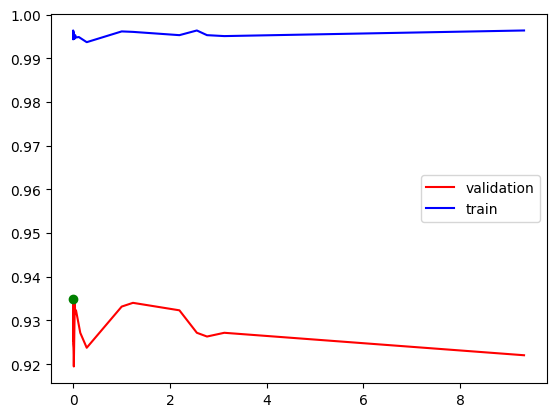

In [132]:
import matplotlib.pyplot as plt

plt.plot(lr_param_list, accs_val, label='validation', color='red')
plt.plot(lr_param_list, accs_train, label='train', color='blue')
plt.plot(lr_opt, acc_best, 'go')
plt.legend()
plt.show()

In [133]:
num_ok = 0
C = np.zeros([4, 4])

for idx, test in enumerate(test_data_scaled_tensor):
    output = net_best(test.type(torch.float))
    target = test_labels_tensor[idx]
    C[int(test_labels_tensor[idx])][int(output.max(0)[1])] += 1
    if output.max(0)[1] == target:
        num_ok += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Confusion matrix, without normalization
[[288.   0.   7.   2.]
 [  1. 298.   0.   4.]
 [  5.   2. 278.  15.]
 [  3.  12.   4. 249.]]
Normalized confusion matrix
[[0.96969697 0.         0.02356902 0.00673401]
 [0.00330033 0.98349835 0.         0.01320132]
 [0.01666667 0.00666667 0.92666667 0.05      ]
 [0.01119403 0.04477612 0.01492537 0.92910448]]


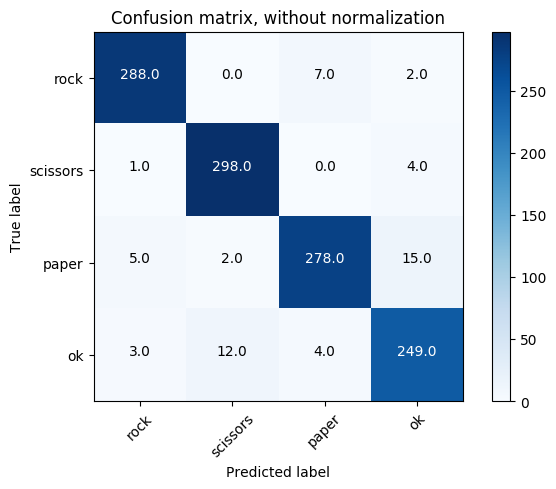

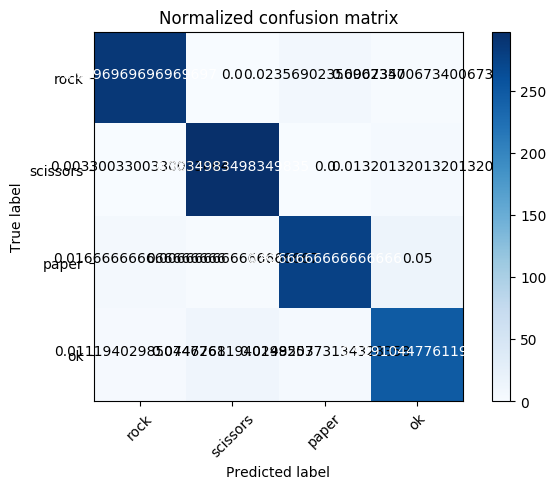

In [134]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(C, classes=classes.values(), normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# **Learning only on the first reading of the muscles, not on all 8 readings**


In [138]:
#define net
net = Net(8, 512, 128, 4)
net.to(device)
print(net)

Net(
  (_layer1): Linear(in_features=8, out_features=512, bias=True)
  (_layer2): Linear(in_features=512, out_features=128, bias=True)
  (_layer3): Linear(in_features=128, out_features=4, bias=True)
  (_dropout1): Dropout(p=0.05, inplace=False)
  (_dropout2): Dropout(p=0.05, inplace=False)
)


In [0]:
train_data_scaled_tensor_first = train_data_scaled_tensor[:, :8]
val_data_scaled_tensor_first = val_data_scaled_tensor[:, :8]
test_data_scaled_tensor_first = test_data_scaled_tensor[:, :8]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Loss - train :
tensor(1.3863, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3859, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.3314, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.3251, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.2736, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.2686, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.2176, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.2121, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.1665, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.1612, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.1289, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - validation :
tensor(1.1243, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - train :
tensor(1.1033, device='cuda:0', grad_fn=<NllLossBackward>)
Loss - v

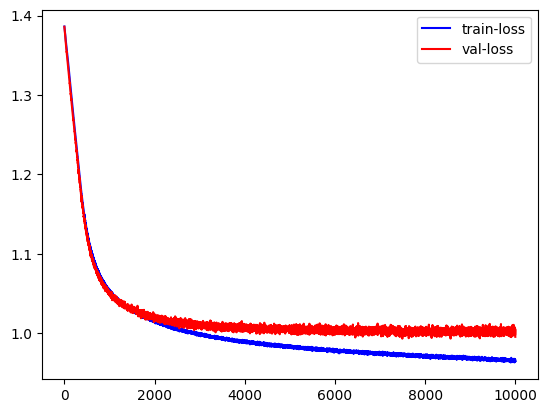

In [140]:
#train from all examples from train set
net.train((train_data_scaled_tensor_first).type(torch.float), (train_labels_tensor).type(torch.long), 
        epochs=10000,lr=0.1,verbose=100,
        val_data = (val_data_scaled_tensor_first).type(torch.float), 
        val_labels=(val_labels_tensor).type(torch.long)) 

In [141]:
print(net.accuracy(test_data_scaled_tensor_first, test_labels_tensor))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


0.7311643835616438


In [142]:
# train a SVM model
C_param = 1
# or decision_function_shape='ovr'
svm_model = svm.SVC(C_param, decision_function_shape='ovo', class_weight='balanced') # define the model
print(svm_model)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [144]:
from sklearn.metrics import accuracy_score

svm_model.fit(train_data_scaled[:, :8], train_labels) # train

predicted_labels_test = svm_model.predict(test_data_scaled[:, :8]) # predit

print(accuracy_score(test_labels, predicted_labels_test))

0.6712328767123288
